In [ ]:
!pip install vaderSentiment
!pip install scikit-surprise
!pip install folium
!pip install surprise
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2610388 sha256=149f9aaecad377320c671ca6fddedc0b92dcc227288d5606a4c6f48179eae26c
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
!pip install "numpy<2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import warnings

# sklearn ML tools
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split as sklearn_train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Advanced ML
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Recommendation system
from surprise import Reader, Dataset, SVD, accuracy, BaselineOnly, SlopeOne
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate

# Utilities
import joblib
import random

# Plotting config
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
dublin_encoded_df = pd.read_csv('dublin_encoded_df.csv')
dublin_encoded_df.head(2)

,id_x,host_id,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,avg_rating,number_of_reviews,neighbourhood_freq,property_type_freq
0,44077,193005,1.0,1,2.0,2.0,1.0,1.0,2.0,76.0,4.827143,144400,0.001211,0.006663
1,85156,193005,1.0,1,2.0,2.0,1.5,1.0,1.0,91.0,4.804286,117649,0.001211,0.006663


In [ ]:
dublin_aggregated_df = pd.read_csv('dublin_aggregated_df.csv')
dublin_aggregated_df.head(2)

,id_x,host_id,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,avg_rating,number_of_reviews,neighbourhood,property_type,neighbourhood_freq,property_type_freq
0,44077,193005,1.0,1,2.0,2.0,1.0,1.0,2.0,76.0,4.827143,144400,"Churchtown, Ireland",Private room in bungalow,0.001211,0.006663
1,85156,193005,1.0,1,2.0,2.0,1.5,1.0,1.0,91.0,4.804286,117649,"Churchtown, Ireland",Private room in bungalow,0.001211,0.006663


In [ ]:
dublin_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_x                 1651 non-null   int64  
 1   host_id              1651 non-null   int64  
 2   host_response_rate   1651 non-null   float64
 3   host_is_superhost    1651 non-null   int64  
 4   host_listings_count  1651 non-null   float64
 5   accommodates         1651 non-null   float64
 6   bathrooms            1651 non-null   float64
 7   bedrooms             1651 non-null   float64
 8   beds                 1651 non-null   float64
 9   price                1651 non-null   float64
 10  avg_rating           1651 non-null   float64
 11  number_of_reviews    1651 non-null   int64  
 12  neighbourhood_freq   1651 non-null   float64
 13  property_type_freq   1651 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 180.7 KB


In [ ]:
dublin_aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_x                 1651 non-null   int64  
 1   host_id              1651 non-null   int64  
 2   host_response_rate   1651 non-null   float64
 3   host_is_superhost    1651 non-null   int64  
 4   host_listings_count  1651 non-null   float64
 5   accommodates         1651 non-null   float64
 6   bathrooms            1651 non-null   float64
 7   bedrooms             1651 non-null   float64
 8   beds                 1651 non-null   float64
 9   price                1651 non-null   float64
 10  avg_rating           1651 non-null   float64
 11  number_of_reviews    1651 non-null   int64  
 12  neighbourhood        1651 non-null   object 
 13  property_type        1651 non-null   object 
 14  neighbourhood_freq   1651 non-null   float64
 15  property_type_freq   1651 non-null   f

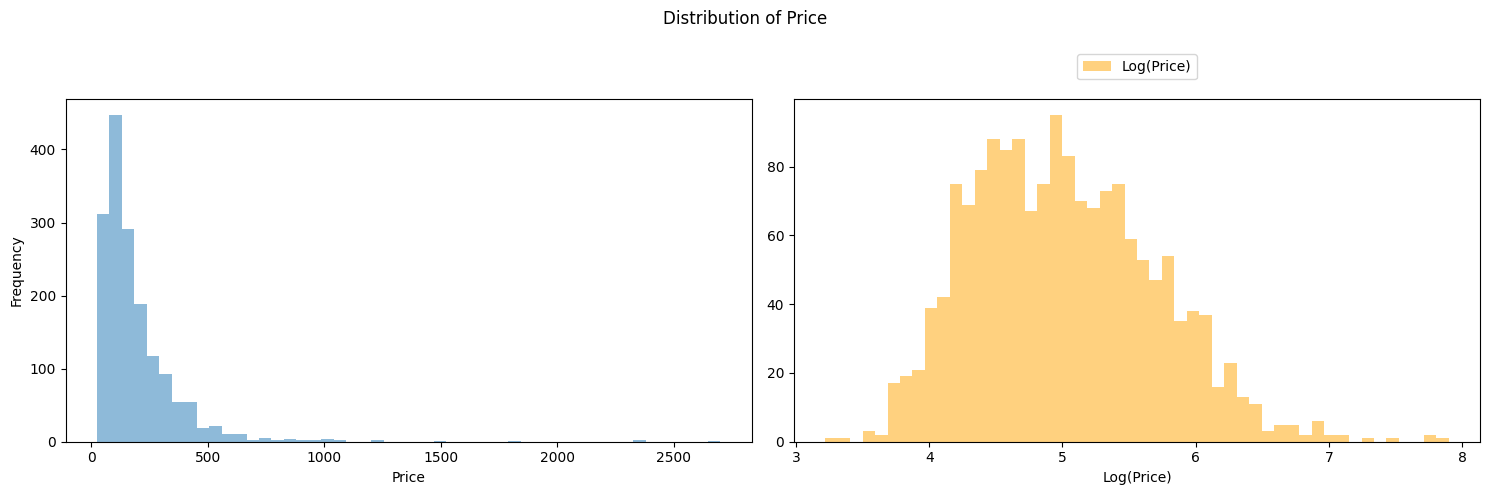

In [ ]:
# split data
X = dublin_encoded_df.drop(['id_x', 'price', 'host_id', 'bathrooms', 'bedrooms', 'number_of_reviews', 'neighbourhood_freq', 'property_type_freq', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'beds'], axis=1)
y = dublin_encoded_df['price']

# log transform y variable(price)
y_log = np.log(y)
y_log.name = "log(price)"

# plot the raw y variable and log transformed y variable
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # figure with 2 subplots

# Plot original price distribution
ax[0].hist(y, bins=50, alpha=0.5, label="Price")
ax[0].set_xlabel("Price")
ax[0].set_ylabel("Frequency")

# Plot log-transformed price distribution
ax[1].hist(y_log, bins=50, color="orange", alpha=0.5, label="Log(Price)")
ax[1].set_xlabel("Log(Price)")

# Add legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

# main title
plt.suptitle("Distribution of Price")

plt.tight_layout()
plt.show()

In [ ]:
#LOG transform target variable price.
y_log = np.log(dublin_encoded_df['price'])

# Use only 'accommodates' as the feature
X_log = dublin_encoded_df[['accommodates']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define a pipeline with standard scaling followed by linear regression
model_log_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),       # Feature scaling to zero mean and unit variance
    ('linreg', LinearRegression())      # Linear regression model
])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def fit_log_results(pipe, X_train, X_test, y_train, y_test):
    """
    Fits pipeline on log-transformed target and returns evaluation metrics in log scale.

    Metrics:
    - RMSE (Root Mean Squared Error)
    - MAE (Mean Absolute Error)
    - R² Score (Coefficient of Determination)
    """
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Calculate RMSE by taking square root of MSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # R2 score (usually reported on test set)
    r2 = r2_score(y_test, y_test_pred)

    print(f"Train RMSE (log-scale): {train_rmse:.4f}")
    print(f"Test RMSE (log-scale): {test_rmse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("------------------------------------")


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def cross_validate_log_results(pipe, X, y, cv=5):
    """
    Performs cross-validation and returns log-scale metrics:
    - RMSE (Root Mean Squared Error)
    - MAE (Mean Absolute Error)
    - R² Score
    """
    y_pred = cross_val_predict(pipe, X, y, cv=cv)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Cross-validated RMSE (log-scale): {rmse:.4f}")
    print(f"Cross-validated MAE: {mae:.4f}")
    print(f"Cross-validated R² Score: {r2:.4f}")
    print("------------------------------------")


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def learn_curves(pipe, X, y, cv=5):
    """
    Generates learning curves plotting RMSE (Root Mean Squared Error) on log-transformed target.
    """
    train_sizes, train_scores, val_scores = learning_curve(
        pipe, X, y, cv=cv, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Convert negative MSE to RMSE
    train_rmse_mean = np.sqrt(-np.mean(train_scores, axis=1))
    val_rmse_mean = np.sqrt(-np.mean(val_scores, axis=1))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse_mean, 'o-', label='Training RMSE')
    plt.plot(train_sizes, val_rmse_mean, 'o-', label='Validation RMSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE (log-scale target)')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()


Train RMSE (log-scale): 0.4574
Test RMSE (log-scale): 0.4614
Train MAE: 0.3381, Test MAE: 0.3637
R² Score: 0.5620
------------------------------------
Cross-validated RMSE (log-scale): 0.4594
Cross-validated MAE: 0.3434
Cross-validated R² Score: 0.5520
------------------------------------


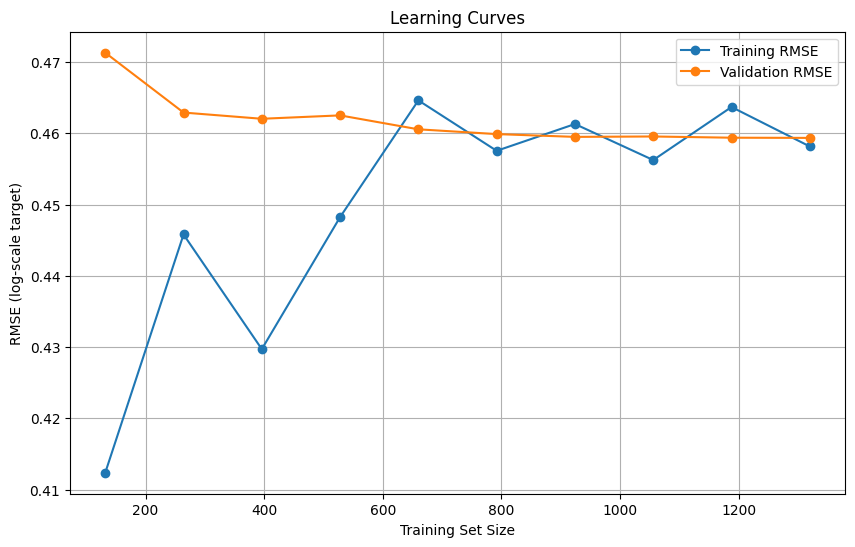

In [ ]:
from sklearn.model_selection import KFold

# Define KFold cross-validator with shuffle and fixed random seed for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Fit the model on training data and evaluate on test data
fit_log_results(model_log_pipeline, X_train_log, X_test_log, y_train_log, y_test_log)

# Perform cross-validated evaluation using KFold splits
cross_validate_log_results(model_log_pipeline, X_log, y_log, cv=kf)

# Plot learning curves using the same KFold cross-validator
learn_curves(model_log_pipeline, X_log, y_log, cv=kf)


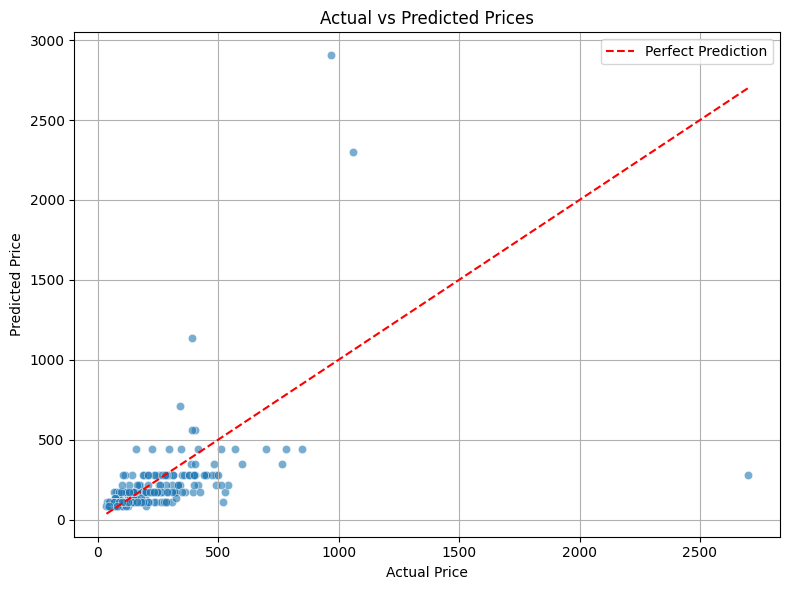

Root Mean Squared Error: 44,511.10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Predict on test set
y_pred_log = model_log_pipeline.predict(X_test_log)

# Inverse the log transformation
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# Scatter plot: Actual vs Predicted Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         '--r', label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print RMSE in original price scale
rmse = mean_squared_error(y_actual, y_pred)
print(f"Root Mean Squared Error: {rmse:,.2f}")

Train RMSE (log-scale): 0.4297
Test RMSE (log-scale): 0.4356
Train MAE: 0.3148, Test MAE: 0.3367
R² Score: 0.6096
------------------------------------
Cross-validated RMSE (log-scale): 0.4334
Cross-validated MAE: 0.3207
Cross-validated R² Score: 0.6012
------------------------------------


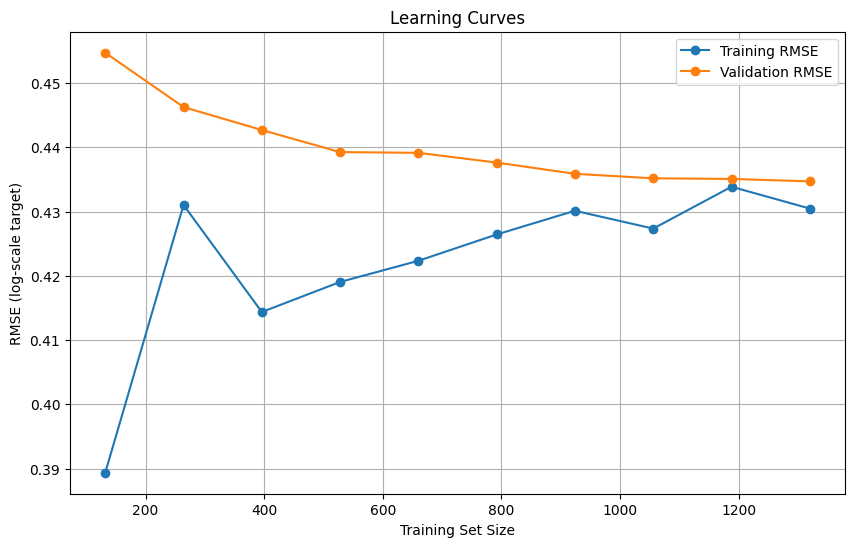

In [ ]:
dt_model_log = Pipeline([
    ('scaler', StandardScaler()), # Standardizes the data
    ('dt', DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42))
])

# Fit and evaluate the model
fit_log_results(dt_model_log, X_train_log, X_test_log, y_train_log, y_test_log)

# Call the function to cross-validate the pipeline
cross_validate_log_results(dt_model_log, X_log, y_log, cv=kf)
# learn curves
learn_curves(dt_model_log, X_log, y_log)

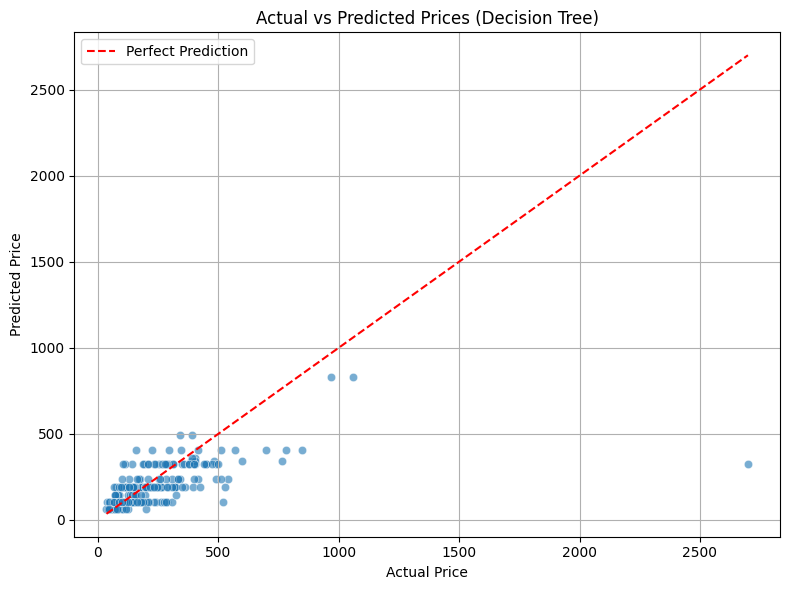

Root Mean Squared Error: 25,629.40


In [ ]:
# Predict on test set using the fitted model
y_pred_log = dt_model_log.predict(X_test_log)

# Inverse log transformation to return to original price scale
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)

# Reference line (perfect predictions)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         '--r', label='Perfect Prediction')

# Plot formatting
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Decision Tree)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Show RMSE
rmse = mean_squared_error(y_actual, y_pred)
print(f"Root Mean Squared Error: {rmse:,.2f}")

Train RMSE (log-scale): 0.4289
Test RMSE (log-scale): 0.4360
Train MAE: 0.3138, Test MAE: 0.3372
R² Score: 0.6090
------------------------------------
Cross-validated RMSE (log-scale): 0.4334
Cross-validated MAE: 0.3204
Cross-validated R² Score: 0.6011
------------------------------------


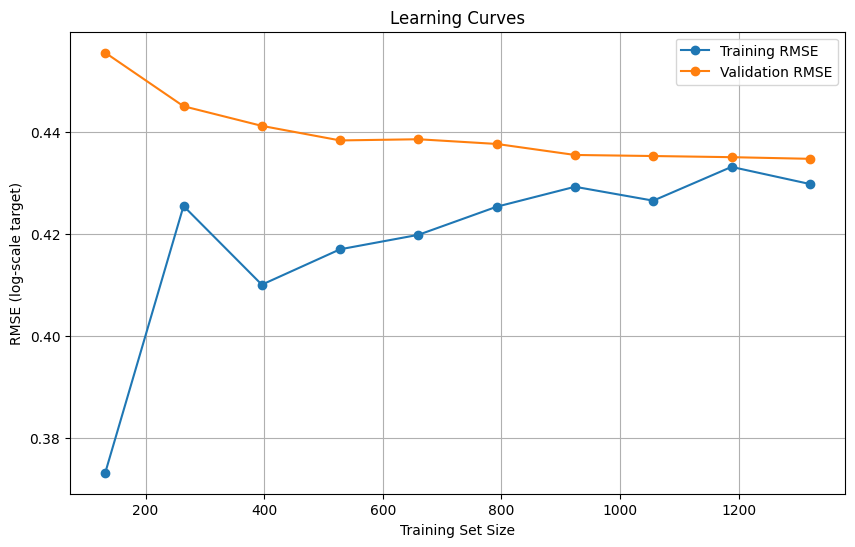

In [ ]:
rf_model_log = Pipeline([
    ('scaler', StandardScaler()), # Standardizes the data
    ('rf', RandomForestRegressor(random_state=42))
])

# Fit and evaluate the model
fit_log_results(rf_model_log, X_train_log, X_test_log, y_train_log, y_test_log)
# cross-validate the pipeline
cross_validate_log_results(rf_model_log, X_log, y_log, cv=kf)
# learn curves
learn_curves(rf_model_log, X_log, y_log)

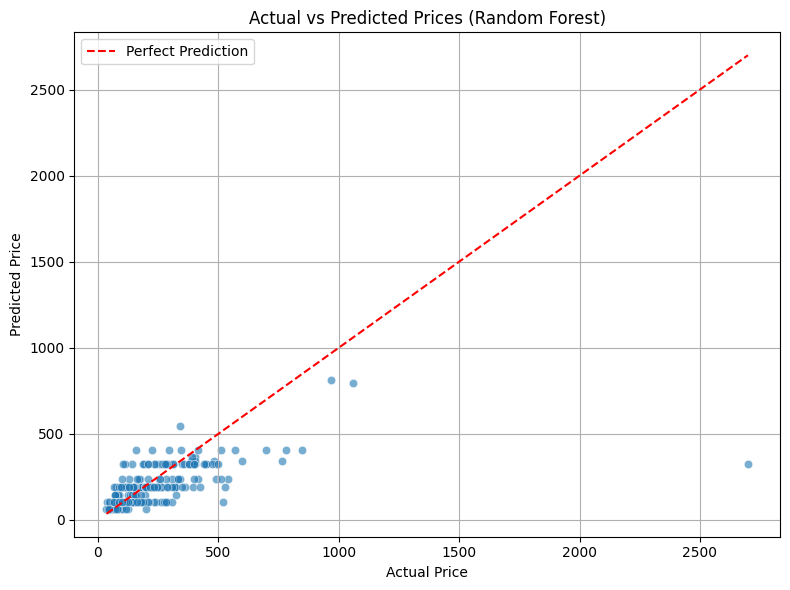

Root Mean Squared Error: 25,728.92


In [ ]:
# Predict on test set using the fitted model
y_pred_log = rf_model_log.predict(X_test_log)

# Inverse log transformation to get actual prices
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)

# Reference line for perfect predictions
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         '--r', label='Perfect Prediction')

# Plot settings
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Show RMSE
rmse = mean_squared_error(y_actual, y_pred)
print(f"Root Mean Squared Error: {rmse:,.2f}")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),  # Creates polynomial features
    ('scaler', StandardScaler()),  # Standardizes the data
    ('linreg', LinearRegression())  # Fits linear regression on polynomial features
])

Train RMSE (log-scale): 0.4344
Test RMSE (log-scale): 0.4388
Train MAE: 0.3186, Test MAE: 0.3400
R² Score: 0.6038
------------------------------------
Cross-validated RMSE (log-scale): 0.4356
Cross-validated MAE: 0.3229
Cross-validated R² Score: 0.5971
------------------------------------


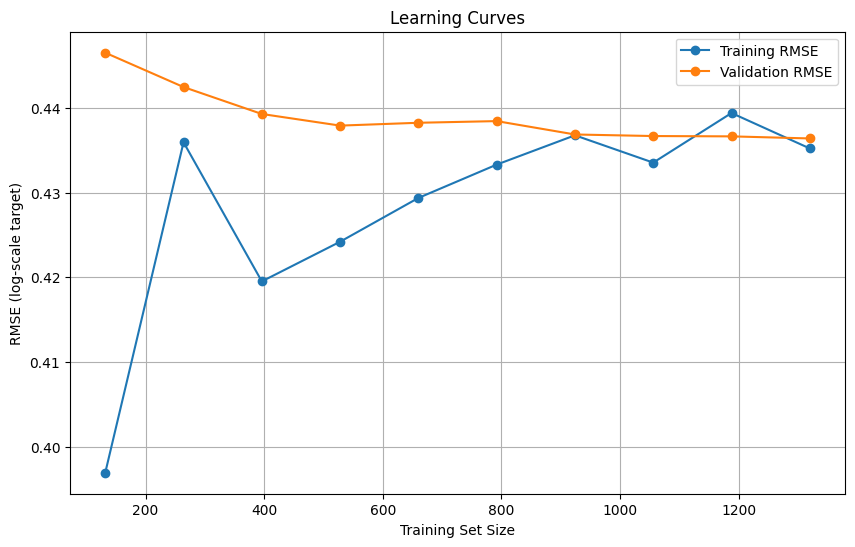

In [ ]:
# Fit and evaluate the model
fit_log_results(poly_model, X_train_log, X_test_log, y_train_log, y_test_log)
# cross-validate the pipeline
cross_validate_log_results(poly_model, X_log, y_log, cv=kf)
# learn curves
learn_curves(poly_model, X_log, y_log)

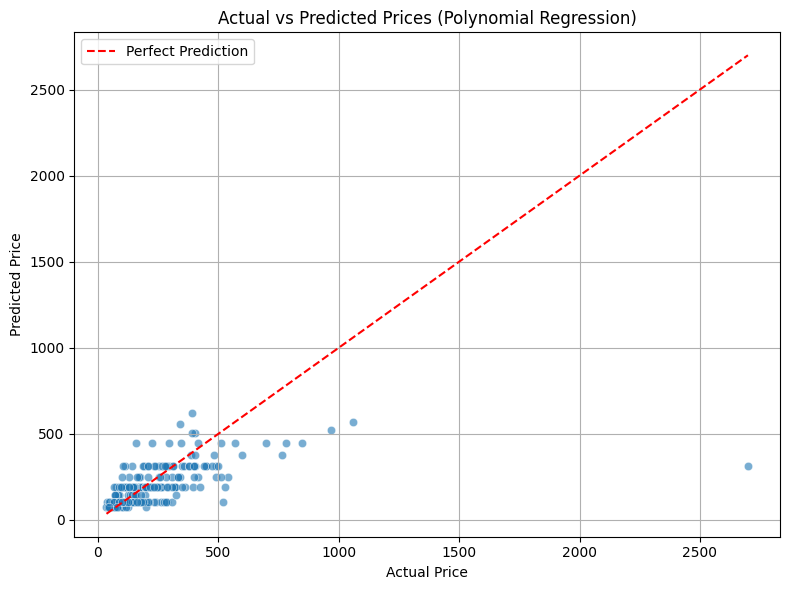

Root Mean Squared Error: 26,864.53


In [ ]:
# Predict on test set using the fitted model
y_pred_log = poly_model.predict(X_test_log)

# Inverse log transformation
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)

# Line for perfect predictions
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         '--r', label='Perfect Prediction')

# Labels and formatting
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Show RMSE
rmse = mean_squared_error(y_actual, y_pred)
print(f"Root Mean Squared Error: {rmse:,.2f}")

Train RMSE (log-scale): 0.4287
Test RMSE (log-scale): 0.4360
Train MAE: 0.3133, Test MAE: 0.3370
R² Score: 0.6090
------------------------------------
Cross-validated RMSE (log-scale): 0.4339
Cross-validated MAE: 0.3207
Cross-validated R² Score: 0.6003
------------------------------------


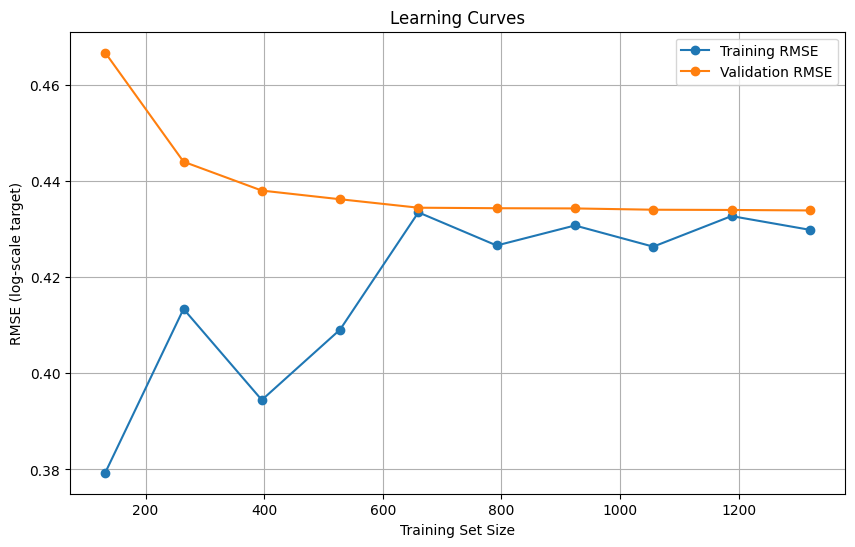

In [ ]:
# model pipeline
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the model pipeline with XGBRegressor
xgb_model_log = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5))
])

# Fit and evaluate the model using your previously defined functions
fit_log_results(xgb_model_log, X_train_log, X_test_log, y_train_log, y_test_log)

# Cross-validate the pipeline using KFold cv (assuming 'kf' defined earlier)
cross_validate_log_results(xgb_model_log, X_log, y_log, cv=kf)

# Plot learning curves
learn_curves(xgb_model_log, X_log, y_log, cv=kf)


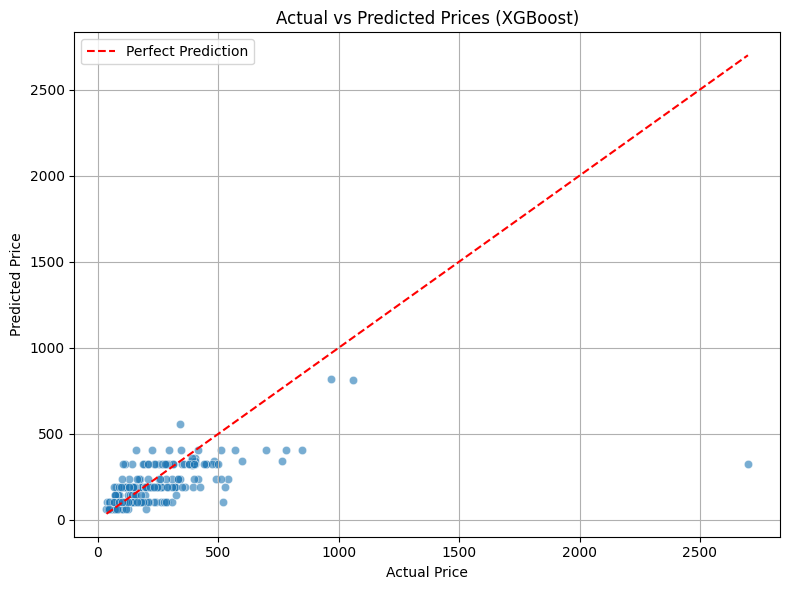

Root Mean Squared Error: 25,708.56


In [ ]:
# Predict on test set
y_pred_log = xgb_model_log.predict(X_test_log)

# Inverse log transform to original scale
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# Plot scatter of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)

# Reference line for perfect prediction
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         '--r', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print RMSE
rmse = mean_squared_error(y_actual, y_pred)
print(f"Root Mean Squared Error: {rmse:,.2f}")